<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/AutoEncoder_CNN_GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = "/content/drive/My Drive/University/PiLab/TrajectoryAugmentation/201605_Image/"

In [4]:
import os
import glob

os.chdir( data_dir )

files = glob.glob("*png")

In [5]:
import cv2

def get_im(path):
  img = cv2.imread(path, 0)
  resized = cv2.resize(img, (128, 128))
  return resized

In [6]:
X_train, X_test = [ ], [ ]

i = 0
for fl in files:
    img = get_im(fl)
    if i < 10:
        X_test.append( img )
        i += 1
    else:
        X_train.append(img)

In [7]:
X_train = np.array(X_train)
X_train = X_train.astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( len( X_train ), 128, 128, 1 ) )

print(np.array(X_train).shape)

(470, 128, 128, 1)


In [13]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import keras

In [9]:
input_img = Input(shape=(128, 128, 1))

# Encoding #
x = Conv2D( 64, ( 3, 3 ), activation = 'relu', padding = 'same' )( input_img )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = Conv2D( 32, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = Conv2D( 16, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

# Decoding #
x = Conv2D( 16, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

x = Conv2D( 32, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

x = Conv2D( 64, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = UpSampling2D( ( 2, 2 ) )( x )

decoded = Conv2D( 1, ( 3, 3 ), activation = 'sigmoid', padding = 'same' )( x )

In [14]:
autoencoder = keras.models.Model( input_img, decoded )
autoencoder.compile( optimizer = 'adam', loss = 'binary_crossentropy' )

In [15]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)       

In [16]:
history = autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 20, shuffle = True )

Epoch 1/50
24/24 [==============================] - 2s 68ms/step - loss: 0.1608
Epoch 2/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0229
Epoch 3/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0125
Epoch 4/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0113
Epoch 5/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0104
Epoch 6/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0090
Epoch 7/50
24/24 [==============================] - 1s 50ms/step - loss: 0.0081
Epoch 8/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0078
Epoch 9/50
24/24 [==============================] - 1s 49ms/step - loss: 0.0077
Epoch 10/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0076
Epoch 11/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0075
Epoch 12/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0074
Epoch 13/50
24/24 [==================

In [17]:
X_test = np.array(X_test)
X_test = X_test.astype('float32')/255.
X_test = np.reshape( X_test, ( len( X_test ), 128, 128, 1 ) )

In [18]:
decoded_imgs = autoencoder.predict( X_test )

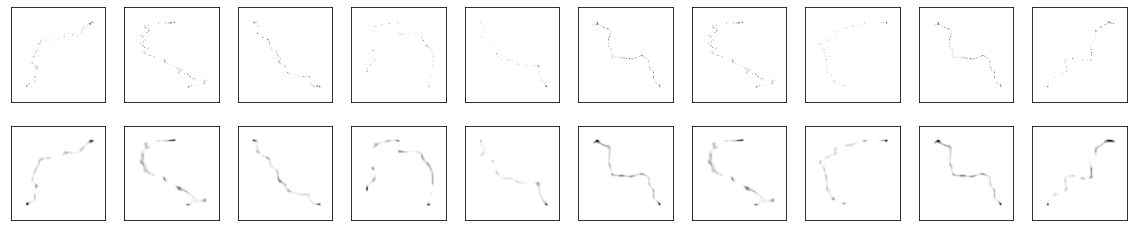

In [19]:
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(128 , 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()